# **TASK 1 :- Prediction using Supervised ML**

##**Problem Statment**
###Predict the percentage of student based on number of study hours

####Author: Sanjyot Dharankar

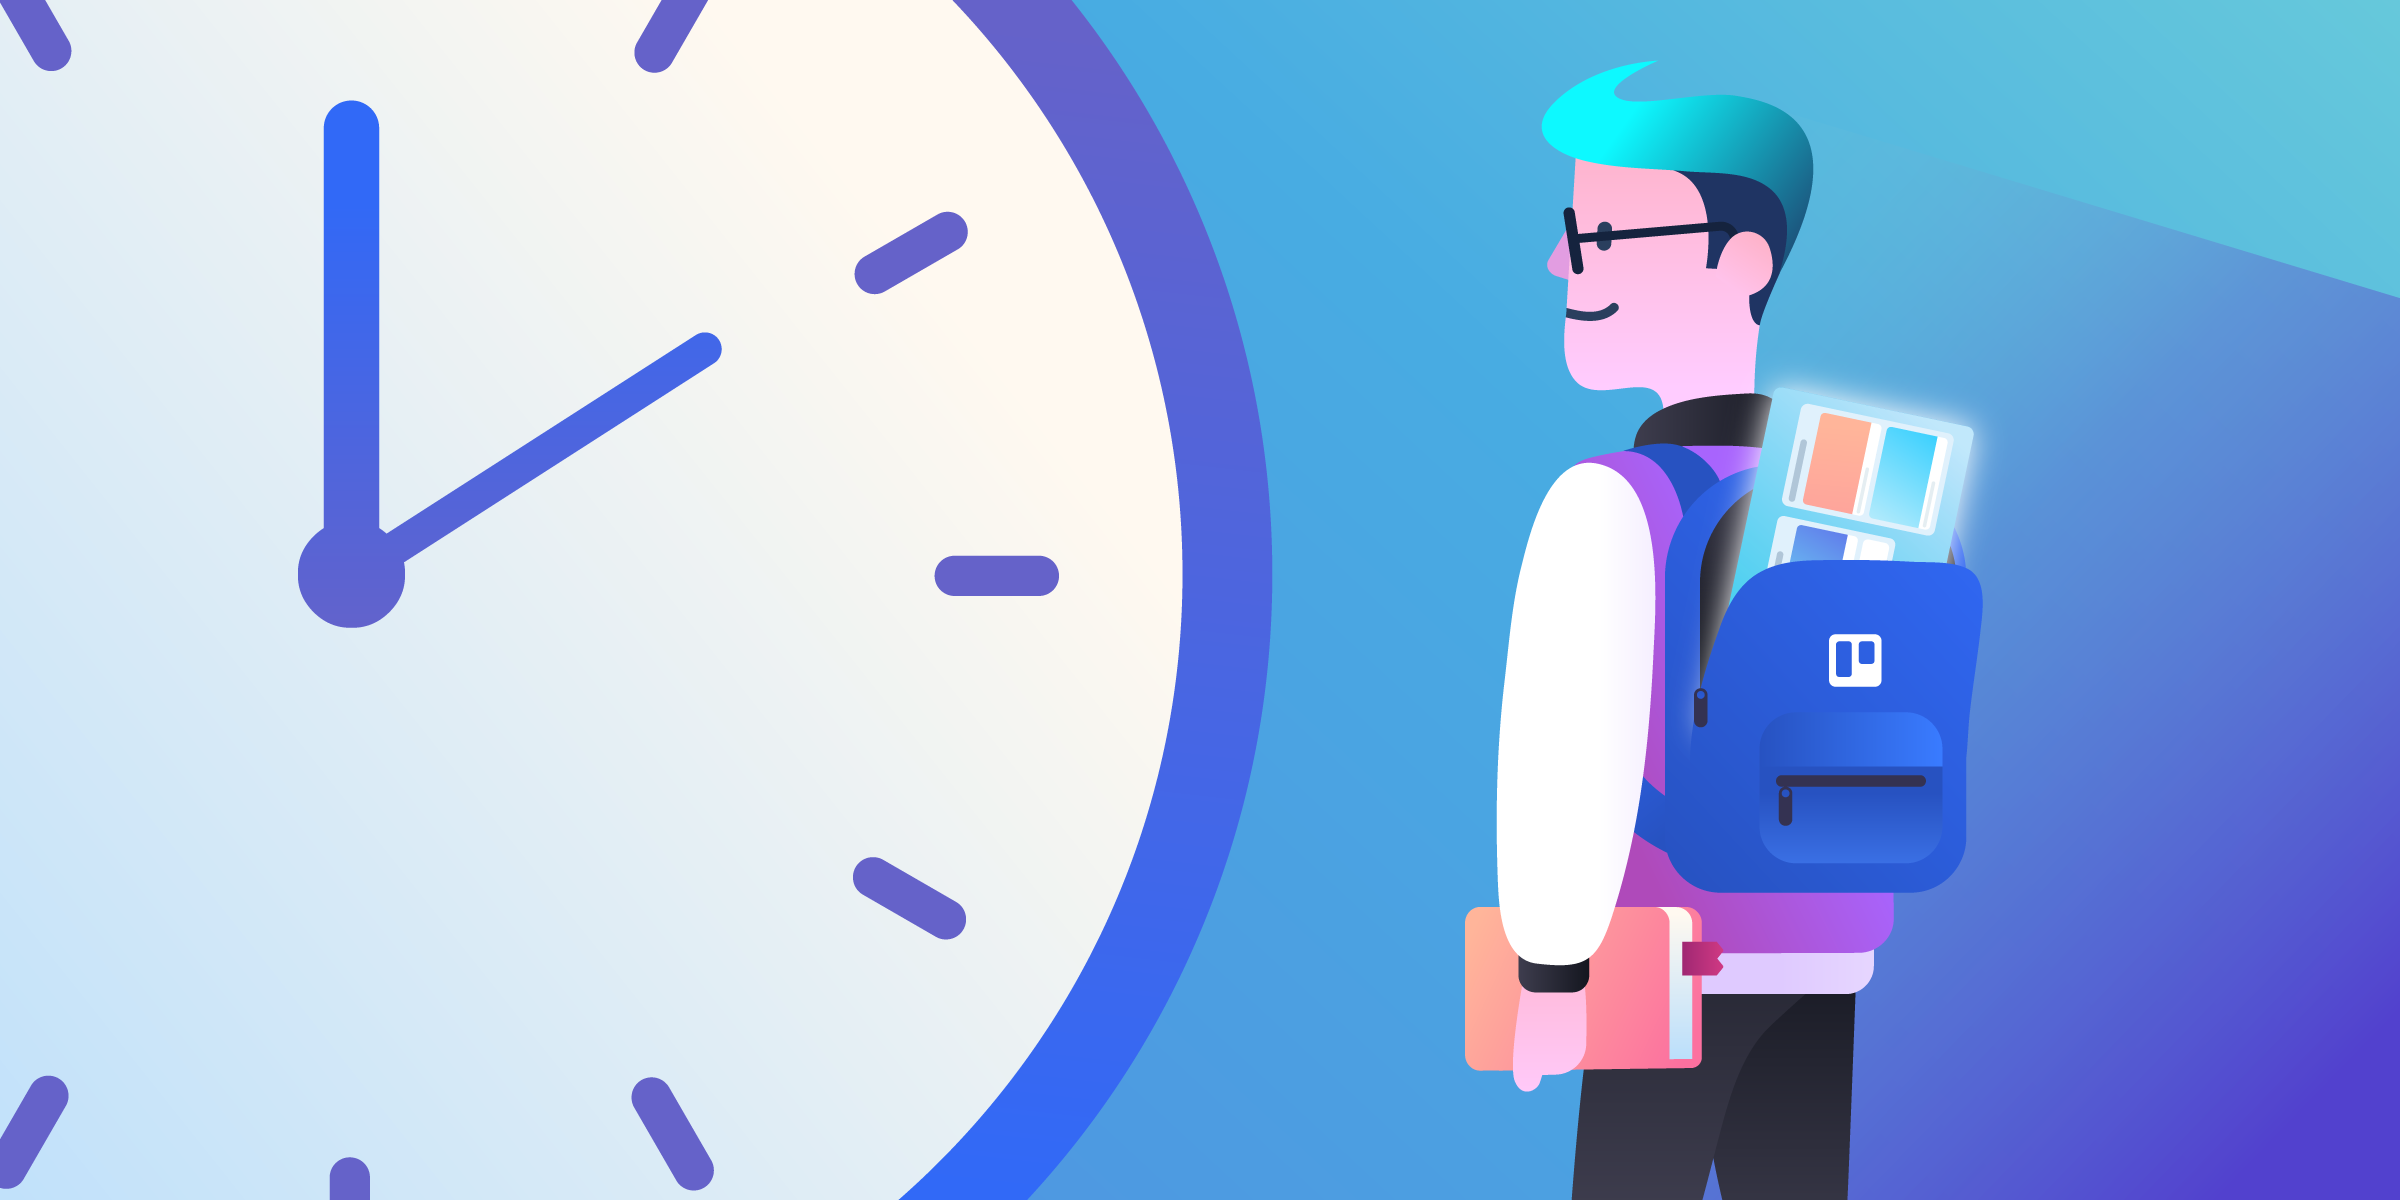

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [ ]:
#read dataset
dataset=pd.read_csv('/content/student_scores - student_scores.csv')
dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###EDA

In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

By seeing this will get to know tha there is not null values in our data

<ipython-input-7-659f98fe1dfd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.Hours)


<Axes: xlabel='Hours', ylabel='Density'>

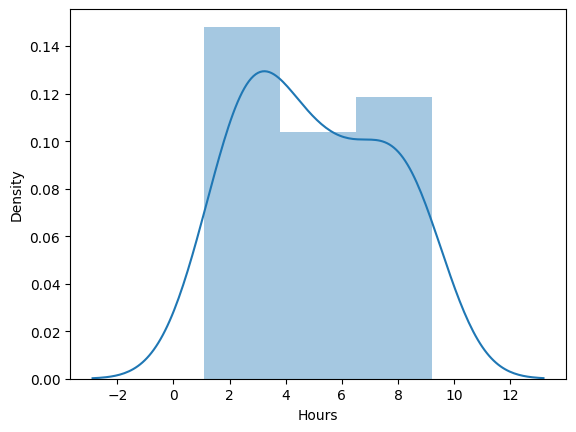

In [ ]:
sns.distplot(dataset.Hours)

The distplot of the feature column is normally distributed so there is no outliers in feature column.

<Axes: xlabel='Hours', ylabel='Scores'>

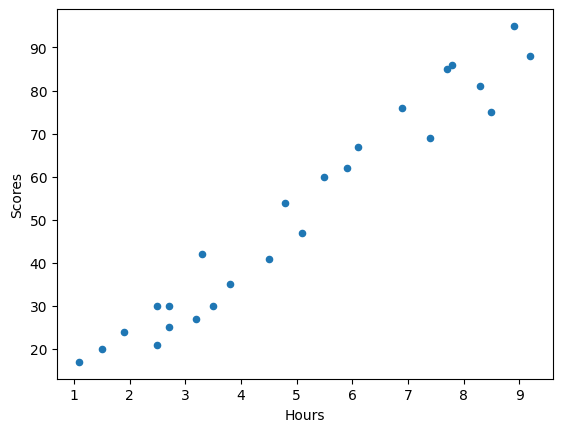

In [ ]:
dataset.plot('Hours','Scores',kind='scatter')

<Axes: >

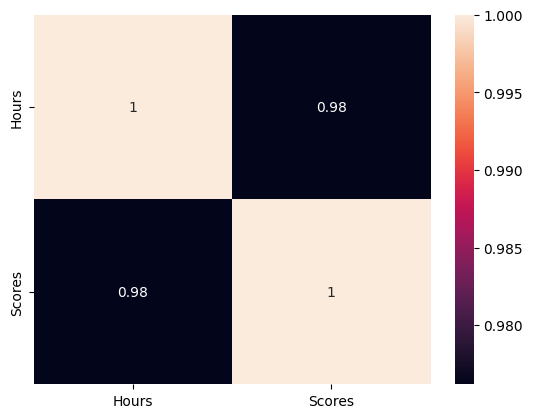

In [ ]:
#heatmap
sns.heatmap(dataset.corr(),annot=True)

##2: Prepare the data

In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

##3: Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
print(x_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [ ]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
print(y_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [ ]:
print(y_test)

[20 27 69 30 62]


##4: Train the model

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

##5: Make predictions on the testing set

In [ ]:
y_pred = regressor.predict(x_test)


## 6: Visualize the training set results

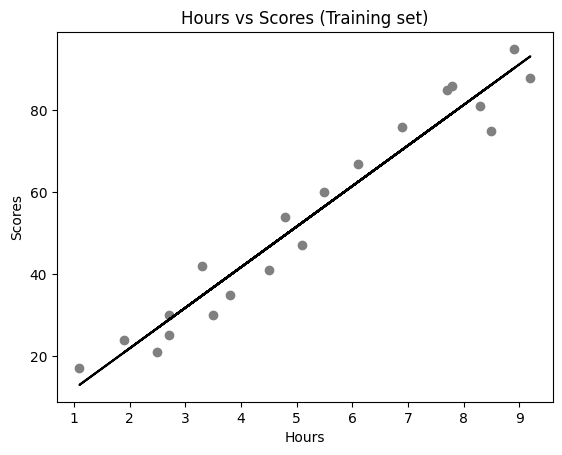

In [ ]:
plt.scatter(x_train, y_train, color='grey')
plt.plot(x_train, regressor.predict(x_train), color='black')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


##7: Visualize the testing set results

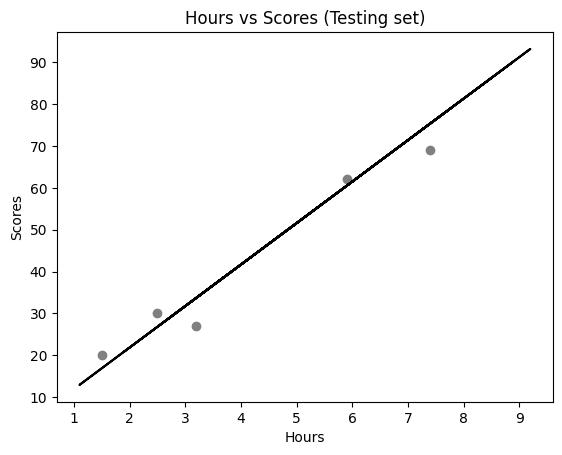

In [ ]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_train, regressor.predict(x_train), color='black')
plt.title('Hours vs Scores (Testing set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


# **Task**: Make a prediction for 9.25 hours/day

In [ ]:
hours = [[9.25]]
pred_score = regressor.predict(hours)
print("Predicted score for 9.25 hours/day is", pred_score[0])


Predicted score for 9.25 hours/day is 93.69173248737539


##Model Evaluation

In [ ]:
# Importing the required library
from sklearn import metrics

# Making predictions on the test set
y_pred = regressor.predict(x_test)

# Evaluating the model using Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 4.183859899002982


This is the final step which is evluation the model.In this we have seen the mean_absolute_error which is 4.183